In [141]:
import sys
sys.path.append("../../")

In [142]:
from src import Value
from src import MLP

from IPython.display import clear_output

In [143]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import random
import numpy as np
%matplotlib inline 

In [144]:
random.seed(42)

In [145]:
# prepare data

iris = load_iris()


def minmax_norm(data: list):
    min_values = np.min(data, axis=0)
    max_values = np.max(data, axis=0)
    return (data - min_values) / (max_values - min_values)


def zscore_norm(data):
    return (data - np.mean(data)) / np.std(data)


combined_data = list(
    zip(zscore_norm(iris.data), minmax_norm(iris.target))
)  # i score normalization

# combined_data = list(zip(minmax_norm(iris.data), minmax_norm(iris.target))) # min max normalization
# combined_data = list(zip(iris.data, iris.target)) # no normalization
random.shuffle(combined_data)
shx, shy = zip(*combined_data)
X, y = list([list(x) for x in shx]), list(shy)


training_data_percent = 0.80
training_size = int(len(X) * training_data_percent)
testing_size = len(X) - training_size
training_data_points, training_targets = X[:training_size], y[:training_size]
testing_data_points, testing_targets = X[-testing_size:], y[-testing_size:]

In [146]:
# Define a Model
number_of_inputs = len(training_data_points[0])
number_of_outputs_for_each_layer = [4, 4, 1]

mlp = MLP(len(training_data_points[0]), number_of_outputs_for_each_layer)
losses = []
total_number_of_epochs = 0

In [147]:
# Train a Model
number_of_epochs = 100

for epoch in range(number_of_epochs + 1):
    clear_output()
    print(f"Training: {(epoch / number_of_epochs) * 100}%")
    # Forward pass
    actual_ys = [mlp(x)[0] for x in training_data_points]
    loss: Value = sum((expected_y - actual_y)**2 for expected_y,
                      actual_y in zip(training_targets, actual_ys))
    # Collect all losses
    losses.append(loss.data)
    total_number_of_epochs +=1
    # zero grad
    for p in mlp.parameters():
        p.grad = 0.0
    # Backward pass
    loss.backward()

    for p in mlp.parameters():
        p.data += -0.001 * p.grad
        

Training: 100.0%


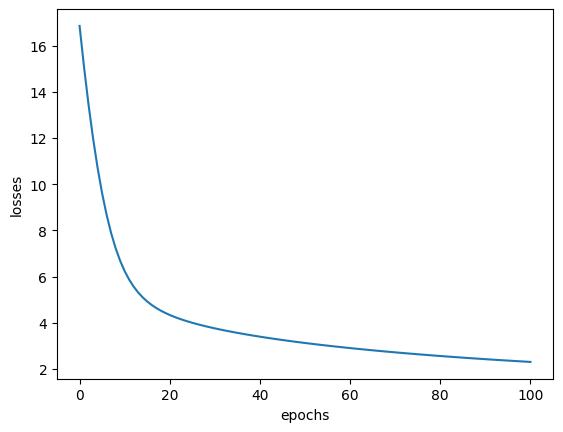

In [148]:
plt.plot(range(total_number_of_epochs), losses)
plt.xlabel('epochs')
plt.ylabel('losses')
plt.show()

In [149]:
# Test a Model
def test(mlp: MLP, testing_data_points, testing_targets):
    """Test if model guess iris specie correctly
    """
    results = [mlp(x)[0] for x in testing_data_points]
    
    actual = [0.0 if abs(result.data) < 0.33 else 0.5 if abs(result.data) < 0.66 else 1.0 for result in results]
    
    accuracy = (sum([1 if actual[i] == testing_targets[i] else 0 for i in range(len(testing_targets)) ]) / len(testing_targets)) * 100 

    for i, result in enumerate(results):
        print(f"#{i} | Target: {testing_targets[i]} | Actual: {actual[i]}")
    print(f"Total accuracy: {accuracy}")
        
test(mlp, testing_data_points, testing_targets)

#0 | Target: 1.0 | Actual: 1.0
#1 | Target: 0.0 | Actual: 0.0
#2 | Target: 0.5 | Actual: 1.0
#3 | Target: 0.5 | Actual: 0.5
#4 | Target: 0.0 | Actual: 0.0
#5 | Target: 1.0 | Actual: 1.0
#6 | Target: 0.5 | Actual: 0.5
#7 | Target: 0.0 | Actual: 0.0
#8 | Target: 0.5 | Actual: 0.5
#9 | Target: 1.0 | Actual: 1.0
#10 | Target: 0.5 | Actual: 0.5
#11 | Target: 1.0 | Actual: 1.0
#12 | Target: 0.5 | Actual: 0.5
#13 | Target: 1.0 | Actual: 1.0
#14 | Target: 1.0 | Actual: 1.0
#15 | Target: 0.5 | Actual: 0.5
#16 | Target: 0.5 | Actual: 1.0
#17 | Target: 0.0 | Actual: 0.0
#18 | Target: 0.0 | Actual: 0.0
#19 | Target: 0.0 | Actual: 0.0
#20 | Target: 1.0 | Actual: 1.0
#21 | Target: 0.0 | Actual: 0.0
#22 | Target: 1.0 | Actual: 1.0
#23 | Target: 0.0 | Actual: 0.0
#24 | Target: 0.0 | Actual: 0.0
#25 | Target: 0.5 | Actual: 0.5
#26 | Target: 0.5 | Actual: 0.5
#27 | Target: 0.5 | Actual: 1.0
#28 | Target: 0.0 | Actual: 0.0
#29 | Target: 0.0 | Actual: 0.0
Total accuracy: 90.0
